In [1]:
import pandas as pd 
import numpy as np 
from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy,SkewnessInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis


import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = r"C:\Users\91786\Desktop\DS\swiggy_fd\data\raw\train.csv"
df = pd.read_csv(data_path)

In [3]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-nu

In [4]:
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
count         45593.000000          45593.000000                45593.000000   
mean             17.017729             70.231332                   17.465186   
std               8.185109             22.883647                    7.335122   
min             -30.905562            -88.366217                    0.010000   
25%              12.933284             73.170000                   12.988453   
50%              18.546947             75.898497                   18.633934   
75%              22.728163             78.044095                   22.785049   
max              30.914057             88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  
count                 45593.000000       45593.000000  
mean                     70.845702           1.023359  
std                      21.118812           0.839065  
min          

In [3]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')


In [4]:
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)'].str.extract('(\d+)')[0], errors='coerce')
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

In [5]:
df = df.replace('NaN',np.nan)


Missing Values Count by Column:
Delivery_person_Age        1854
Delivery_person_Ratings    1908
Time_Orderd                1731
multiple_deliveries         993
dtype: int64

Visualizing Missing Values...


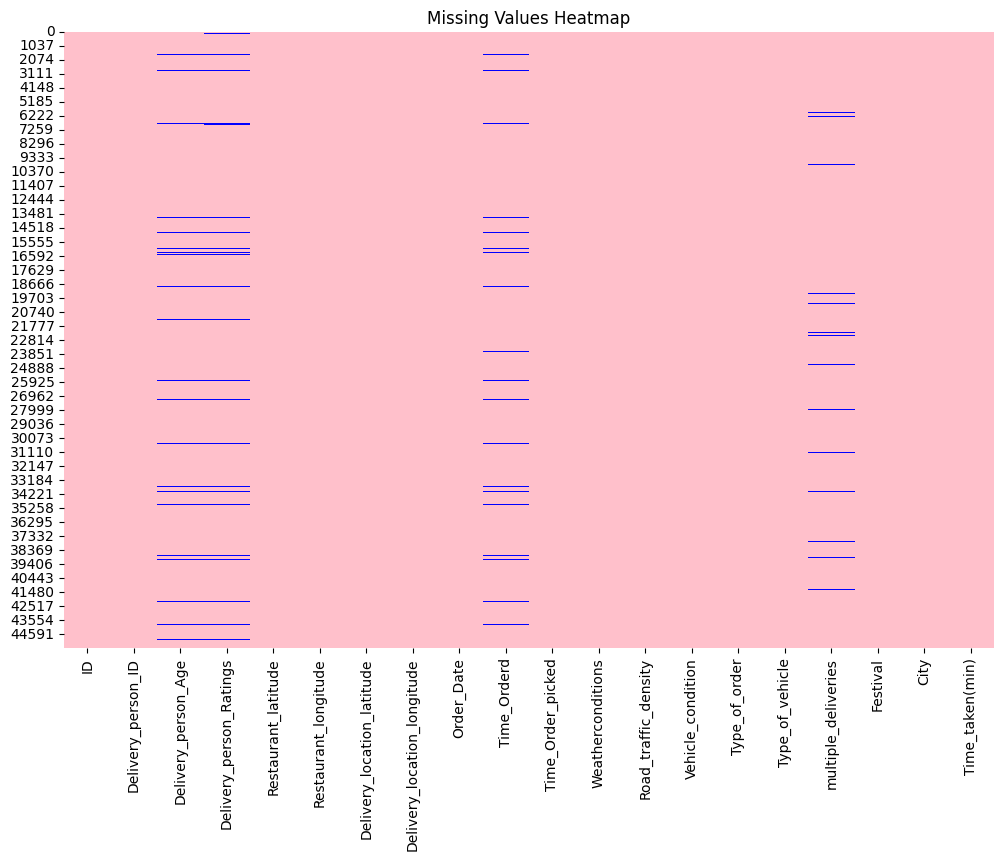

In [10]:
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

In [9]:
data_inspector.set_strategy(SkewnessInspectionStrategy())
data_inspector.execute_inspection(df)


Skewness Analysis for Numerical Features:

Skewness values:
Delivery_person_Age: 0.019
  Delivery_person_Age is approximately symmetrically distributed.
Delivery_person_Ratings: -2.494
  Delivery_person_Ratings is highly negatively skewed.
Vehicle_condition: 0.072
  Vehicle_condition is approximately symmetrically distributed.
multiple_deliveries: 0.325
  multiple_deliveries is approximately symmetrically distributed.
Time_taken(min): 0.486
  Time_taken(min) is approximately symmetrically distributed.


## Univariate analysis

In [53]:
import pandas as pd
from typing import List, Dict, Any
import folium
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import numpy as np

class UnivariateAnalysisStrategy:
    def _set_style(self):
        # Define any default styling if needed
        pass

class AdvancedGeospatialAnalysisStrategy(UnivariateAnalysisStrategy):
    def analyze(self, df: pd.DataFrame, features: List[str]) -> Dict[str, Any]:
        self._set_style()

        # Create interactive map with clustering
        center_lat = df['Restaurant_latitude'].mean()
        center_lon = df['Restaurant_longitude'].mean()

        m = folium.Map(location=[center_lat, center_lon],
                      zoom_start=5,
                      tiles='CartoDB positron')

        # Add heatmap layer

        heat_data = df[['Restaurant_latitude', 'Restaurant_longitude']].values.tolist()
        HeatMap(heat_data).add_to(m)

        # Add clustered markers

        marker_cluster = MarkerCluster().add_to(m)

        for idx, row in df.iterrows():
            folium.CircleMarker(
                location=[row['Restaurant_latitude'], row['Restaurant_longitude']],
                radius=5,
                popup=f"Restaurant in {row['City']}",
                color='green',
                fill=True
            ).add_to(marker_cluster)

        m.save("delivery_clusters_map.html")

        # Generate scatter plots
        self._plot_spatial_scatter(df)

        # Calculate and map distances
        distance_analysis = self._analyze_distances(df)
        self._map_distances(df, distance_analysis.get('average_delivery_distance_km'))

        # Return spatial statistics (you can extend this)
        spatial_stats = self._calculate_spatial_stats(df, features)
        spatial_stats.update(distance_analysis)
        return spatial_stats

    def _calculate_spatial_stats(self, df: pd.DataFrame, features: List[str]) -> Dict[str, Any]:
        # Implement any specific spatial statistics you want to calculate here
        # For example, you could calculate the bounding box of the restaurants,
        # or the density of restaurants per unit area if you have area information.
        return {}

    def _plot_spatial_scatter(self, df: pd.DataFrame):
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Restaurant_longitude'], df['Restaurant_latitude'],
                    alpha=0.5, c='green', label='Restaurants', s=10)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title('Scatter Plot of Restaurant Locations')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Scatter plot of Delivery locations (if present)
        if 'Delivery_location_latitude' in df.columns and 'Delivery_location_longitude' in df.columns:
            plt.figure(figsize=(10, 6))
            plt.scatter(df['Delivery_location_longitude'], df['Delivery_location_latitude'],
                        alpha=0.5, c='blue', label='Delivery Locations', s=10)
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.title('Scatter Plot of Delivery Locations')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    def _calculate_distance(self, row):
        if (pd.notna(row['Restaurant_latitude']) and pd.notna(row['Restaurant_longitude']) and
                pd.notna(row['Delivery_location_latitude']) and pd.notna(row['Delivery_location_longitude'])):
            restaurant_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
            delivery_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
            return geodesic(restaurant_coords, delivery_coords).km
        return None

    def _analyze_distances(self, df: pd.DataFrame) -> Dict[str, Any]:
        if 'Delivery_location_latitude' in df.columns and 'Delivery_location_longitude' in df.columns:
            df['delivery_distance_km'] = df.apply(self._calculate_distance, axis=1)
            average_distance = df['delivery_distance_km'].mean()
            max_distance = df['delivery_distance_km'].max()
            min_distance = df['delivery_distance_km'].min()
            return {
                'average_delivery_distance_km': average_distance,
                'max_delivery_distance_km': max_distance,
                'min_delivery_distance_km': min_distance
            }
        else:
            return {
                'average_delivery_distance_km': None,
                'max_delivery_distance_km': None,
                'min_delivery_distance_km': None
            }

    def _map_distances(self, df: pd.DataFrame, average_distance: float = None):
        if 'Delivery_location_latitude' in df.columns and 'Delivery_location_longitude' in df.columns:
            center_lat = df[['Restaurant_latitude', 'Delivery_location_latitude']].mean().mean()
            center_lon = df[['Restaurant_longitude', 'Delivery_location_longitude']].mean().mean()

            m = folium.Map(location=[center_lat, center_lon],
                          zoom_start=10,
                          tiles='CartoDB positron')

            for idx, row in df.iterrows():
                if pd.notna(row['delivery_distance_km']):
                    restaurant_loc = [row['Restaurant_latitude'], row['Restaurant_longitude']]
                    delivery_loc = [row['Delivery_location_latitude'], row['Delivery_location_longitude']]

                    # Add a line connecting restaurant and delivery location
                    folium.PolyLine([restaurant_loc, delivery_loc], color="blue", weight=1, opacity=0.5).add_to(m)

                    # Add markers for restaurant and delivery
                    folium.CircleMarker(restaurant_loc, radius=5, color='green', fill=True,
                                        popup=f"Restaurant in {row['City']}").add_to(m)
                    folium.CircleMarker(delivery_loc, radius=5, color='red', fill=True,
                                        popup=f"Delivery to ({delivery_loc[0]:.4f}, {delivery_loc[1]:.4f})").add_to(m)

            if average_distance is not None:
                folium.Marker(
                    [center_lat + 0.05, center_lon],
                    popup=f"Average Delivery Distance: {average_distance:.2f} km",
                    icon=folium.Icon(color="purple", icon="info-sign")
                ).add_to(m)

            m.save("delivery_distance_map.html")
            print("Delivery distance map saved to delivery_distance_map.html")
        else:
            print("Delivery location data not available to map distances.")

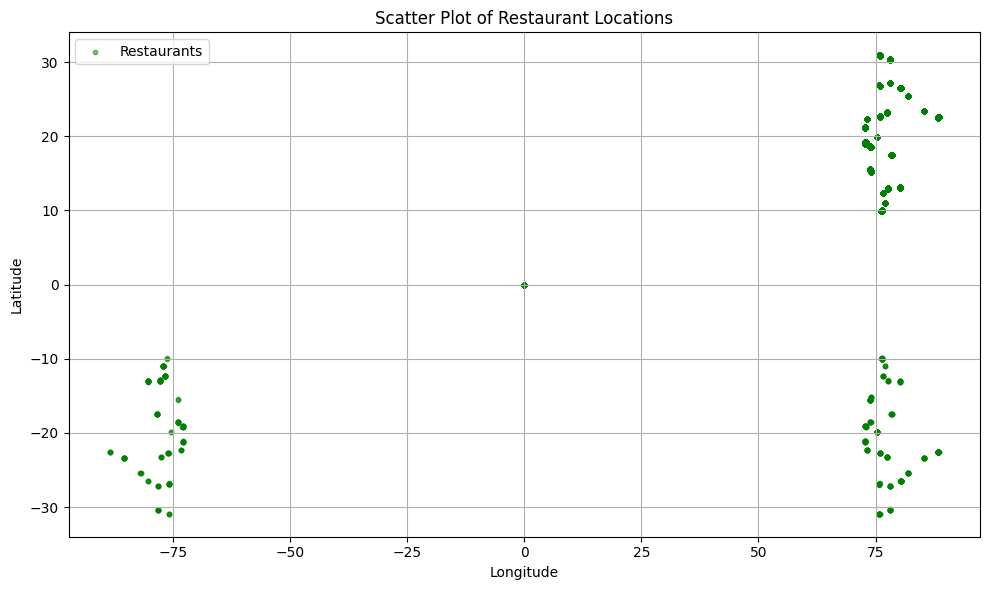

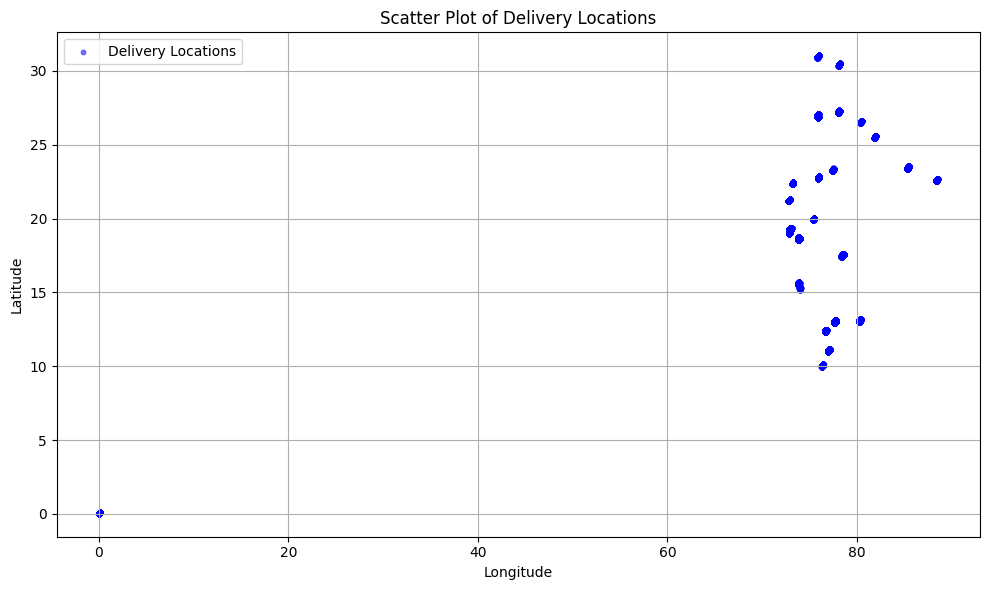

Delivery distance map saved to delivery_distance_map.html
{'average_delivery_distance_km': 99.19894979940997, 'max_delivery_distance_km': 19709.57554316093, 'min_delivery_distance_km': 1.4638371061422368}


In [54]:
# Assuming you have your DataFrame loaded into 'df'
analysis_strategy = AdvancedGeospatialAnalysisStrategy()
results = analysis_strategy.analyze(df, ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'])
print(results)

In [19]:
df = df.dropna()

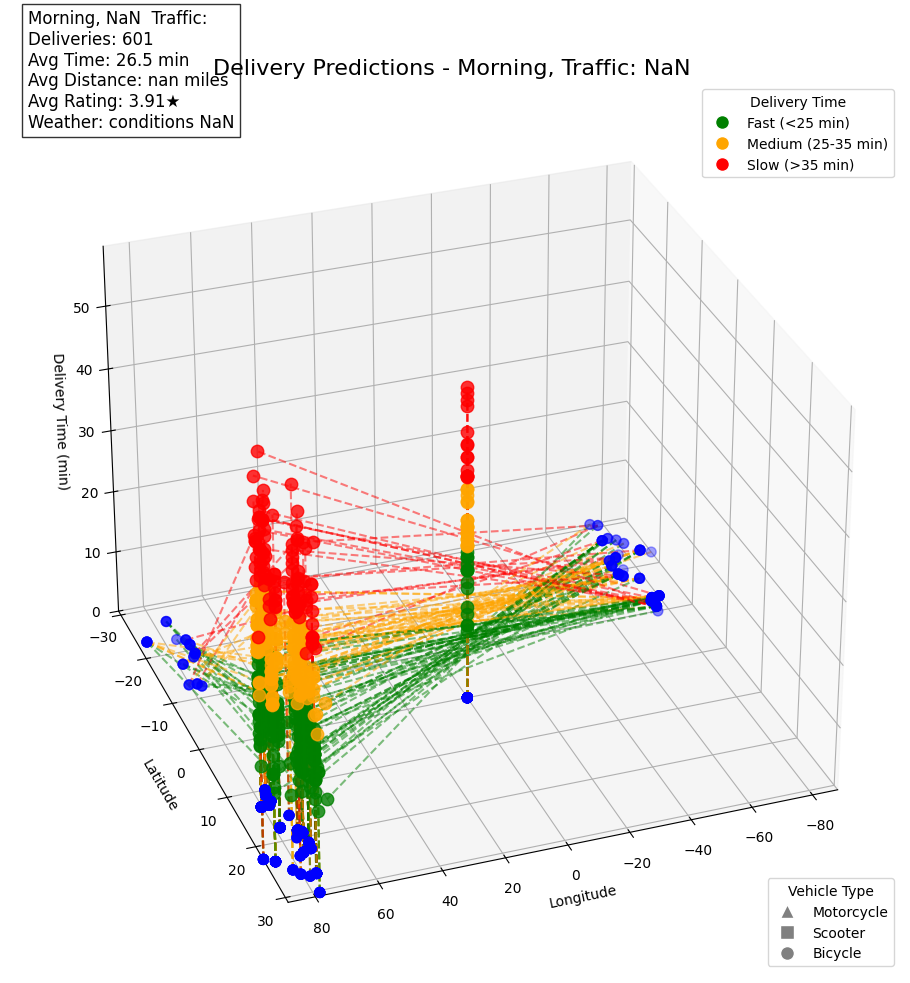

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D



df['Hour'] = df['Order_Date'].dt.hour

# Create the Time_period column based on the Hour column
# Using standard integer values for the bins to ensure proper categorization
df['Time_period'] = pd.cut(df['Hour'], 
                          bins=[0, 11, 14, 17, 24], 
                          labels=['Morning', 'Lunch', 'Afternoon', 'Dinner'],
                          include_lowest=True)  # Include the lowest value in the first bin

# Calculate distances between restaurant and delivery locations (approximate)
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Radius of earth in miles
    r = 3956
# Ensure the necessary columns are not empty
if df['Time_period'].isnull().all() or df['Road_traffic_density'].isnull().all():
    raise ValueError("The required columns for animation are empty. Please check the data preprocessing steps.")

# Add a distance column if not already present
if 'Distance' not in df.columns:
    df['Distance'] = haversine_distance(
        df['Restaurant_latitude'], 
        df['Restaurant_longitude'],
        df['Delivery_location_latitude'], 
        df['Delivery_location_longitude']
    )

# Clean the Time_taken column to make it numeric
if 'Time_taken(min)' in df.columns and df['Time_taken(min)'].dtype == 'object':
    df['Time_taken(min)'] = df['Time_taken(min)'].str.extract(r'(\d+)').astype(float)
if df['Time_period'].isnull().all() or df['Road_traffic_density'].isnull().all():
    raise ValueError("The required columns for animation are empty. Please check the data preprocessing steps.")

# Get unique time periods and traffic densities for animation frames
time_periods = df['Time_period'].dropna().unique()
traffic_densities = df['Road_traffic_density'].dropna().unique()

# Combine time periods and traffic densities for animation
frame_combinations = [(tp, td) for tp in time_periods for td in traffic_densities]
# Set up the 3D figure
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Get unique time periods and traffic densities for animation frames
time_periods = df['Time_period'].unique()
traffic_densities = df['Road_traffic_density'].unique()

# Combine time periods and traffic densities for animation
frame_combinations = [(tp, td) for tp in time_periods for td in traffic_densities]

# Define color mapping for delivery times
def get_delivery_color(time):
    if time < 25:
        return 'green'  # Fast delivery
    elif time < 35:
        return 'orange'  # Medium delivery time
    else:
        return 'red'  # Slow delivery

# Define marker styles based on vehicle type
vehicle_markers = {
    'motorcycle': '^',  # triangle up
    'scooter': 's',     # square
    'bicycle': 'o'      # circle
}

# Function to update the plot for each animation frame
def update(frame_idx):
    ax.clear()
    
    # Set labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Delivery Time (min)')
    
    # Get current frame combination
    current_period, current_traffic = frame_combinations[frame_idx % len(frame_combinations)]
    
    # Set title with current time period and traffic density
    ax.set_title(f'Delivery Predictions - {current_period}, Traffic: {current_traffic}', fontsize=16)
    
    # Filter data for current time period and traffic density
    period_data = df[(df['Time_period'] == current_period) & 
                     (df['Road_traffic_density'] == current_traffic)]
    
    # If no data for this combination, show a message
    if len(period_data) == 0:
        ax.text2D(0.5, 0.5, f"No deliveries for {current_period} with {current_traffic} traffic", 
                 transform=ax.transAxes, ha='center', fontsize=14)
        return
    
    # Plot restaurants (blue dots)
    ax.scatter(period_data['Restaurant_longitude'], 
               period_data['Restaurant_latitude'], 
               np.zeros_like(period_data['Time_taken(min)']),  # At z=0
               color='blue', s=50, label='Restaurant', zorder=3)
    
    # Plot delivery locations with markers based on vehicle type and color based on delivery time
    for _, row in period_data.iterrows():
        delivery_color = get_delivery_color(row['Time_taken(min)'])
        vehicle_marker = vehicle_markers.get(row['Type_of_vehicle'], 'o')
        
        ax.scatter(row['Delivery_location_longitude'], 
                   row['Delivery_location_latitude'], 
                   row['Time_taken(min)'],
                   color=delivery_color, 
                   marker=vehicle_marker,
                   s=80, 
                   alpha=0.8,
                   zorder=4)
        
        # Draw lines between restaurants and delivery locations in 3D
        ax.plot([row['Restaurant_longitude'], row['Delivery_location_longitude']], 
                [row['Restaurant_latitude'], row['Delivery_location_latitude']],
                [0, row['Time_taken(min)']],  # From z=0 to z=delivery_time
                color=delivery_color, linestyle='--', alpha=0.5, zorder=2)
    
    # Set axis limits
    ax.set_xlim(df['Restaurant_longitude'].min() - 0.01, df['Restaurant_longitude'].max() + 0.01)
    ax.set_ylim(df['Restaurant_latitude'].min() - 0.01, df['Restaurant_latitude'].max() + 0.01)
    ax.set_zlim(0, df['Time_taken(min)'].max() * 1.1)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7, zorder=1)
    
    # Rotate view slightly for each frame to show 3D effect
    ax.view_init(elev=30, azim=(frame_idx*5) % 360)
    
    # Add period and traffic stats
    avg_time = period_data['Time_taken(min)'].mean()
    avg_rating = period_data['Delivery_person_Ratings'].mean()
    avg_distance = period_data['Distance'].mean()
    
    weather_counts = period_data['Weatherconditions'].value_counts()
    most_common_weather = weather_counts.index[0] if len(weather_counts) > 0 else "N/A"
    
    stats_text = (f"{current_period}, {current_traffic} Traffic:\n"
                  f"Deliveries: {len(period_data)}\n"
                  f"Avg Time: {avg_time:.1f} min\n"
                  f"Avg Distance: {avg_distance:.2f} miles\n"
                  f"Avg Rating: {avg_rating:.2f}★\n"
                  f"Weather: {most_common_weather}")
    
    ax.text2D(0.02, 0.95, stats_text, transform=ax.transAxes, fontsize=12,
              bbox=dict(facecolor='white', alpha=0.8))
    
    # Create legend for delivery time
    time_legend = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Fast (<25 min)'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Medium (25-35 min)'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Slow (>35 min)')
    ]
    
    # Create legend for vehicle types
    vehicle_legend = [
        Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', markersize=10, label='Motorcycle'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', markersize=10, label='Scooter'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Bicycle')
    ]
    
    # Place legends at different positions
    first_legend = ax.legend(handles=time_legend, loc='upper right', title="Delivery Time")
    ax.add_artist(first_legend)
    ax.legend(handles=vehicle_legend, loc='lower right', title="Vehicle Type")

# Create animation
num_frames = len(frame_combinations) * 3  # 3 rotations per combination
animation = FuncAnimation(fig, update, frames=num_frames, interval=300, blit=False)

# Save animation as a gif
animation.save('delivery_prediction_3d_animation.gif', writer='pillow', fps=10, dpi=150)

plt.tight_layout()
plt.show()